In [14]:
import pandas as pd

df = pd.read_csv(r'C:\Users\1004515\Documents\CITHA_Jupyter\Pandas\Experimento Prático 02\base_dados_2024.csv')
display(df)


,peixe,produção,custo_medio,mes
0,JARAQUI,405.81,14.41,Fevereiro
1,TAMBAQUI,745.39,10.18,Dezembro
2,MATRINXÃ,198.22,4.87,Abril
3,TAMBAQUI,105.18,13.39,Março
4,JARAQUI,621.06,11.50,Fevereiro
...,...,...,...,...
295,MATRINXÃ,181.89,10.69,Setembro
296,TAMBAQUI,222.79,7.15,Maio
297,MATRINXÃ,901.95,8.69,Abril
298,MATRINXÃ,684.18,5.07,Outubro


In [20]:
# Quantidade média produzida de cada tipo de peixe
media_producao = df.groupby('peixe')['produção'].mean().reset_index()
print("\nQuantidade média produzida de cada tipo de peixe (kg):")
print(media_producao)


Quantidade média produzida de cada tipo de peixe (kg):
      peixe    produção
0   JARAQUI  533.418333
1  MATRINXÃ  518.583580
2  TAMBAQUI  509.996381


In [22]:
# Rentabilidade (produção / custo_medio) por linha
df['rentabilidade'] = df['produção'] / df['custo_medio']

In [23]:
# Rentabilidade média por peixe
rentabilidade_media = df.groupby('peixe')['rentabilidade'].mean().reset_index()
rentabilidade_media = rentabilidade_media.sort_values(by='rentabilidade', ascending=False)

print("\nRentabilidade média de cada tipo de peixe (kg/R$):")
print(rentabilidade_media)


Rentabilidade média de cada tipo de peixe (kg/R$):
      peixe  rentabilidade
1  MATRINXÃ      69.694324
0   JARAQUI      67.446276
2  TAMBAQUI      65.734557


In [9]:
# Qual é o peixe mais rentável
mais_rentavel = rentabilidade_media.iloc[0]
print(f"\nRecomendação: O peixe mais rentável é o '{mais_rentavel['peixe']}' com rentabilidade média de {mais_rentavel['rentabilidade']:.2f} kg/R$")



Recomendação: O peixe mais rentável é o 'MATRINXÃ' com rentabilidade média de 69.69 kg/R$


In [8]:
# Identificando o mês com o menor custo médio
mes_menor_custo = df.loc[df['custo_medio'].idxmin()]
print(f"\nMês com menor custo médio:")
print(f"Mês: {menor_custo['mes']}, Peixe: {menor_custo['peixe']}, Custo Médio: R${mes_menor_custo['custo_medio']:.2f}")


Mês com menor custo médio:
Mês: Dezembro, Peixe: TAMBAQUI, Custo Médio: R$3.11


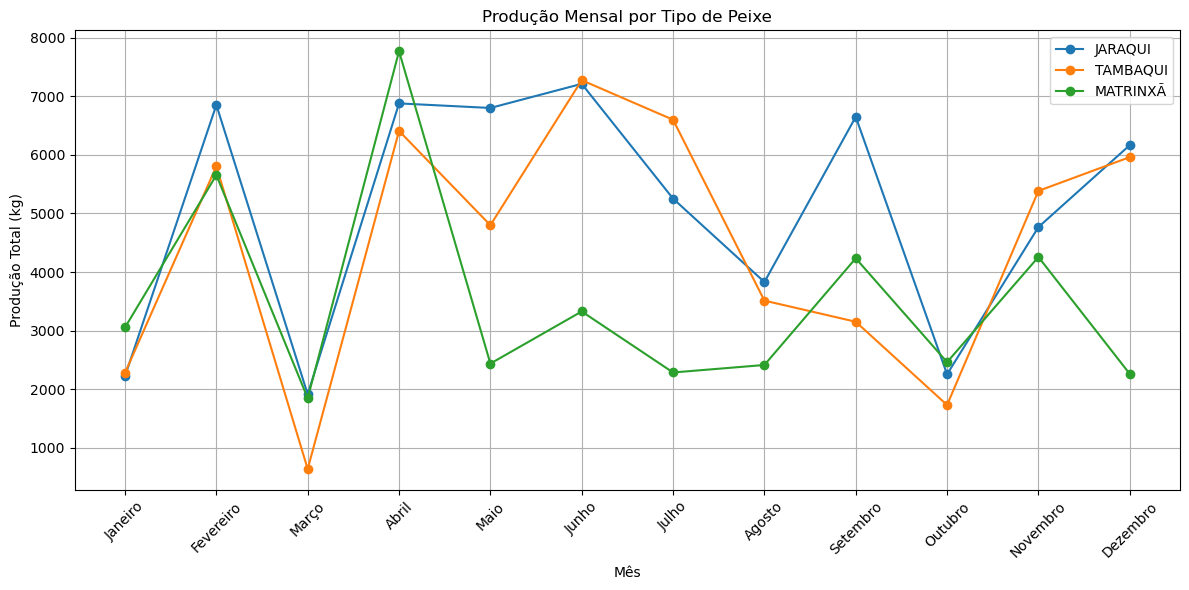

In [35]:
# Gráfico da produção mensal por tipo de peixe usando a biblioteca Matplotlib--->pyplot
plt.figure(figsize=(12, 6))
for peixe in df['peixe'].unique():
    dados_peixe = df[df['peixe'] == peixe]
    producao_mensal = dados_peixe.groupby('mes', observed=True)['produção'].sum().reindex([
        'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
        'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
    ])
    plt.plot(producao_mensal.index, producao_mensal.values, marker='o', label=peixe)

plt.title("Produção Mensal por Tipo de Peixe")
plt.xlabel("Mês")
plt.ylabel("Produção Total (kg)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

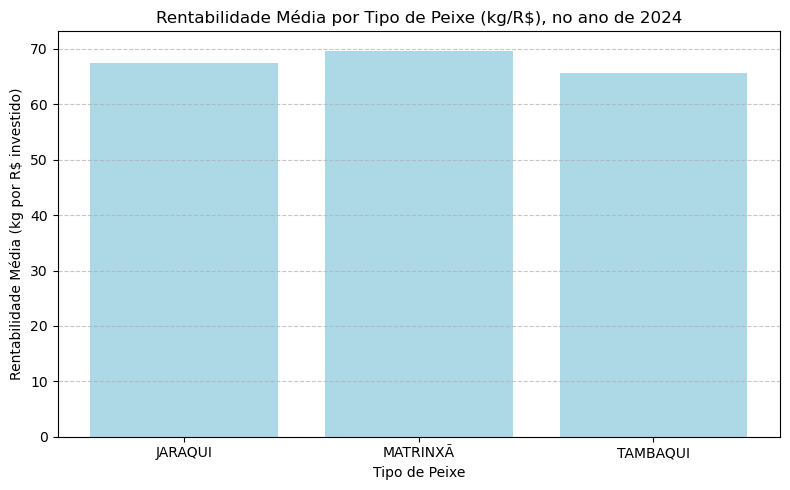

In [29]:
# Fazendo o agrupamento por peixe para tirar a média da rentabilidade
rentabilidade_media = df.groupby('peixe')['rentabilidade'].mean().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(rentabilidade_media['peixe'], rentabilidade_media['rentabilidade'], color='lightblue')
plt.title("Rentabilidade Média por Tipo de Peixe (kg/R$), no ano de 2024")
plt.xlabel("Tipo de Peixe")
plt.ylabel("Rentabilidade Média (kg por R$ investido)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()